Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **1 hour and 30 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Andriy Kashyrskyy"
COLLABORATORS = ""

# CS110 Pre-class Work - Mergesort and recurrences

## Question 1 [time estimate: 20 minutes]

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2), which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations, as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.

**Note**: ```MERGE``` function is to combine two lists together, not to create a sorted list. Please check the parameters carefully to correctly identify two sub-lists you need to merge.

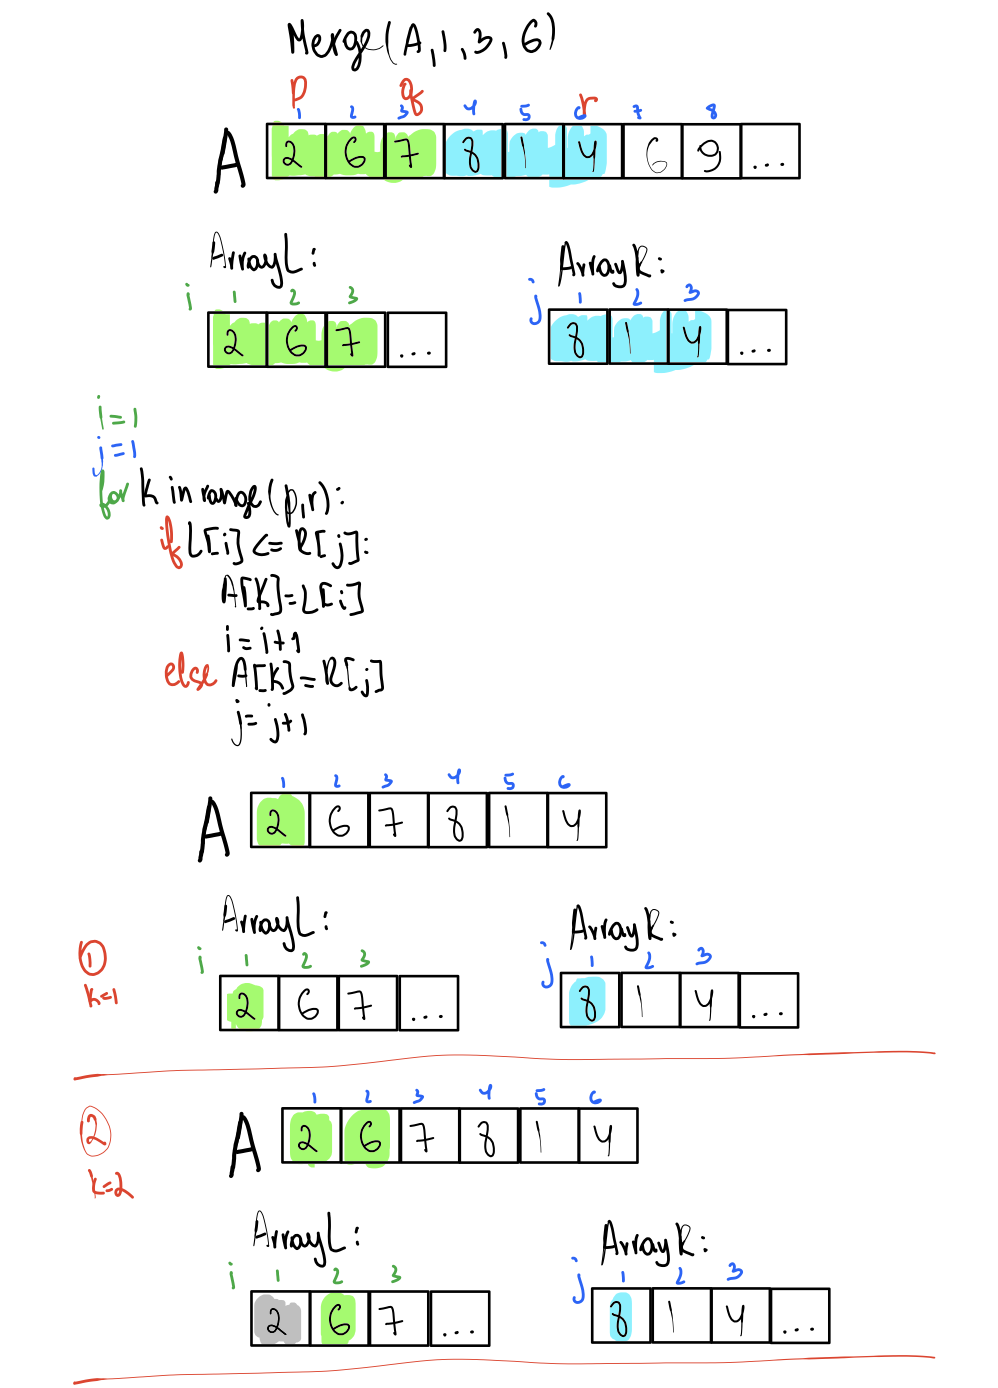

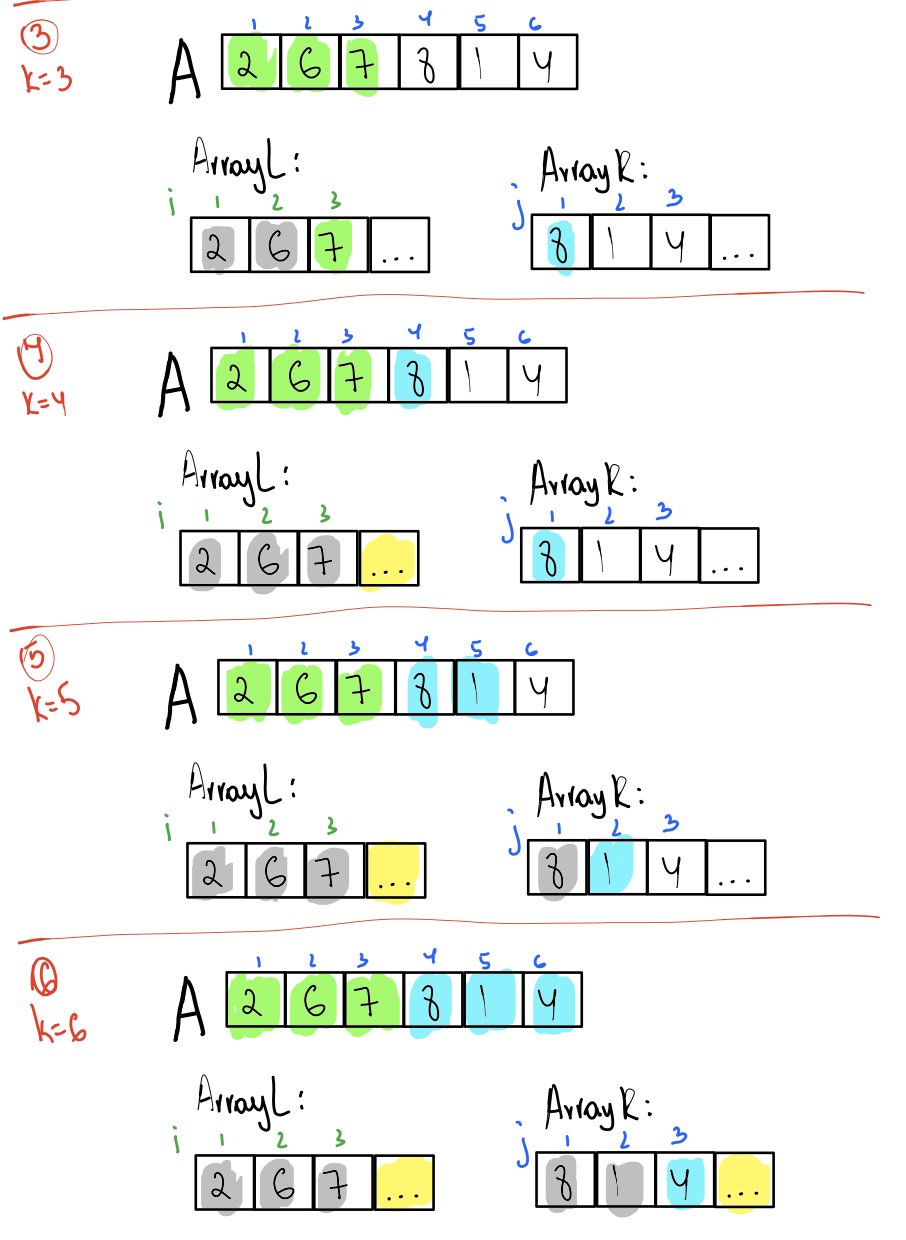

In [5]:
from IPython.display import Image
display(Image(filename='cs110_1_5.png'))
display(Image(filename='cs110_2_5.png'))

## Question 2 [time estimate: 5 minutes]
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python lists). Give your answer in prose in the cell below.

I would create a recursive function, which will take an input of a list, and divide that input into two (based on 1st and last indeces, or, as it is used for merge sort commonly, by first, middle, and last elements). The function for merge sort will have 2 parts - with the first one dividing the list, and the second one comparing the values of the first subarray with the values of the second subarray (and inputting back into a list or original space). We can start by iterating over k elements in a list of A.

## Question 3 [time estimate: 20 minutes]

Write a Python implementation of the merge pseudocode (both parts). Your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A.

**Note**: Please note that the pseudocde in Cormen et. al. works with the indexing convention starting at 1; in Python we will use the customary indexing convention starting at 0.

In [39]:
def merge(A, p, q, r):
    left = A[p:q+1]
    right = A[q+1:r+1]
    left.append(float("inf")) #adding a big number
    ## previously added 999999999, but float("inf") is better
    right.append(float("inf")) #adding a big number
    i = j = 0
    for k in range(p,r+1): #running it through all cells in array A
        if left[i] <= right[j]:
            A[k] = left[i]
            i = i + 1
        else:
            A[k] = right[j]
            j = j + 1
    return A
            
B = [2,5,6,7,1,3,8]
merge(B,0,3,6)
# assert merge(B,0,3,6) == [1,2,3,5,6,7,8]

[1, 2, 3, 5, 6, 7, 8]

In [28]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [time estimate: 5 minutes]

Suppose that your Python implementation of the merge algorithm is already working. Read and comment the code for merge sort below:

In [44]:
# defining the recursive merge-sort function
def merge_sort(A,p,r):
    # if there's more then 1 item in the list, break the list in half
    # and call merge_sort on each half
    if p < r:
        ## the average of the first and last indices
        q = (p+r)//2
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        ## combining two sorted lists together
        merge(A,p,q,r)
    ## returning the sorted list
    return(A)

B = [2,5,6,4,6,7,1,3,8]
merge_sort(B,0,8)

[1, 2, 3, 4, 5, 6, 6, 7, 8]

In [4]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [time estimate: 15 minutes]
Count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. If you are not familiar with what this piece of code is doing, you may want to check the "List Comprehension" section in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx).


In [62]:
import time

def merge(A, p, q, r):
    step = 0
    left = A[p:q+1]
    right = A[q+1:r+1]
    left.append(float("inf")) 
    right.append(float("inf")) 
    i = j = 0
    for k in range(p,r+1): 
        if left[i] <= right[j]:
            A[k] = left[i]
            step = step + 1
            i = i + 1
        else:
            A[k] = right[j]
            step = step + 1
            j = j + 1
    return A, step

def merge_sort(A,p,r):
    # if there's more then 1 item in the list, break the list in half
    # and call merge_sort on each half
    step = 0
    if p < r:
        ## the average of the first and last indices
        q = (p+r)//2
        step = step + 1
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    ## returning the sorted list
    step = step + 1
    return A, step 

for k in range(1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    start = time.time()
    merge_sort(list_k,0,len(list_k)-1)
    end = time.time()
    print ("Time", k,":", end-start, "seconds.")

Time 1 : 0.0002799034118652344 seconds.
Time 2 : 0.0005819797515869141 seconds.
Time 3 : 0.0009179115295410156 seconds.
Time 4 : 0.001203298568725586 seconds.
Time 5 : 0.001483917236328125 seconds.
Time 6 : 0.0018389225006103516 seconds.
Time 7 : 0.002657175064086914 seconds.
Time 8 : 0.0027170181274414062 seconds.
Time 9 : 0.0032248497009277344 seconds.
Time 10 : 0.00347900390625 seconds.
Time 11 : 0.0037810802459716797 seconds.
Time 12 : 0.00415802001953125 seconds.
Time 13 : 0.004294872283935547 seconds.
Time 14 : 0.004492044448852539 seconds.
Time 15 : 0.004873037338256836 seconds.


## Question 6 [time estimate: 25 minutes] 
Use the code you wrote for Lesson "Measuring algorithms' efficiency" (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Use as many cells as you wish (code cells or markdown cells alike) to complete this question.

You may find the section "Simple 2-Dimensional Plots in Python" in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx) helpful.

In [ ]:
## copying code from previous pre-class work
import time
import matplotlib.pyplot as plt

def insertion_sort(A):
    start = time.time()
    step = 0
    for j in range(1, len(A)):
        key = A[j]
        i= j-1
        while i >= 0 and A[i]>key:
            A[i+1] = A[i]
            i = i - 1
        step += 1
        A[i+1] = key
    end = time.time()
    return step

def bubble_sort(A):
    start = time.time()
    step = 0
    for i in range(0, len(A)-1):
        for j in range(0, len(A)-i-1):
            if (A[j] > A [j+1]):
                element = A[j]
                A[j] = A[j+1]
                A[j+1] = element
            step +=1
    end = time.time()
    return step
    
def selection_sort(A):
    start = time.time()
    step = 0
    n = len(A)
    for i in range (0, n-1):
        minidx = i
        for j in range(i+1, n):
            if (A[j] < A[minidx]):
                minidx = j
            step +=1
        elem = A[i]
        A[i] = A[minidx]
        A[minidx] = elem
    step +=1
    end = time.time()
    return step, end-start

def merge_sort(A,p,r):
    # if there's more then 1 item in the list, break the list in half
    # and call merge_sort on each half
    start = time.time()
    step = 0
    if p < r:
        ## the average of the first and last indices
        q = (p+r)//2
        step = step + 1
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    ## returning the sorted list
    step = step + 1
    end = time.time()
    return step 

In [95]:
## setting n for for loops 
n = 10

for k in range(n):
    insertion_t = []
    list_k = [i for i in range(100*k, 0, -1)]
    start = time.time()
    insertion_sort(list_k)
    end = time.time()
    insertion_t.append(end-start)

for k in range(n):
    selection_t = []
    list_k = [i for i in range(100*k, 0, -1)]
    start = time.time()
    selection_sort(list_k)
    end = time.time()
    selection_t.append(end-start)
    selection_t

for k in range(n):
    bubble_t = []
    list_k = [i for i in range(100*k, 0, -1)]
    start = time.time()
    bubble_sort(list_k)
    end = time.time()
    bubble_t.append(end-start)
    bubble_t

for k in range(n):
    merge_time = []
    list_k = [i for i in range(n)]
    start = time.time()
    merge_sort(list_k,0,len(list_k)-1)
    end = time.time()
    merge_time.append(end-start)
    merge_time

#plt.plot(range(n), insertion_t)
#plt.plot(range(n), bubble_t)
#plt.plot(range(n), selection_t)
#plt.plot(range(n), merge_time)
#plt.show()

In [ ]:
## Unfortunately the approach I took (to count time) did not work, and I was unable to count and plot steps. I will attend office hours to seek help with this pre-class work.